In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
base_twitter = pd.read_csv('twitter.csv')
base_twitter

,id,game,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
base_twitter.isnull().sum()

id             0
game           0
sentiment      0
tweet        686
dtype: int64

In [5]:
base_twitter = base_twitter.dropna()

In [6]:
np.unique(base_twitter['sentiment'], return_counts=True)

(array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object),
 array([12875, 22358, 18108, 20655]))

<Axes: xlabel='sentiment', ylabel='count'>

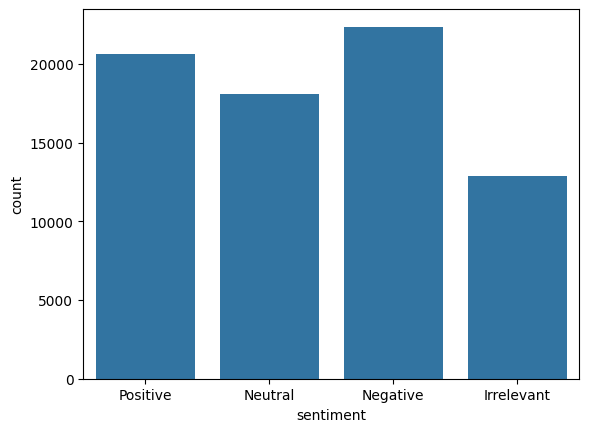

In [7]:
sns.countplot(x = base_twitter['sentiment'])

In [8]:
grafico = px.treemap(base_twitter, path=['sentiment', 'game'])
grafico.show()

#Label Encoder

In [9]:
base_twitter.columns

Index(['id', 'game', 'sentiment', 'tweet'], dtype='object')

In [10]:
x_twitter = base_twitter.iloc[:, [1,3]].values
y_twitter = base_twitter.iloc[:, 2].values

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder_game = LabelEncoder()
label_encoder_tweet = LabelEncoder()

In [12]:
x_twitter[:, 0] = label_encoder_game.fit_transform(x_twitter[:, 0])
x_twitter[:, 1] = label_encoder_tweet.fit_transform(x_twitter[:, 1])

In [13]:
x_twitter

array([[4, 64619],
       [4, 27233],
       [4, 64618],
       ...,
       [21, 36810],
       [21, 36803],
       [21, 36735]], shape=(73996, 2), dtype=object)

In [14]:
np.unique(y_twitter) #['Irrelevant', 'Negative', 'Neutral', 'Positive']

array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object)

In [15]:
from sklearn.model_selection import train_test_split

x_twitter_train, x_twitter_test, y_twitter_train, y_twitter_test = train_test_split(x_twitter, y_twitter, test_size= 0.2, random_state= 0)

x_twitter_train.shape, x_twitter_test.shape

((59196, 2), (14800, 2))

In [16]:
import pickle
with open('twitter.pkl', mode= 'wb') as f:
    pickle.dump([x_twitter_train, y_twitter_train, x_twitter_test, y_twitter_test], f)

#Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
import pickle
with open('twitter.pkl', 'rb') as f:
    x_twitter_train, y_twitter_train, x_twitter_test, y_twitter_test = pickle.load(f)

naive_twitter = GaussianNB()
naive_twitter.fit(x_twitter_train, y_twitter_train)
previsoes = naive_twitter.predict(x_twitter_test)
previsoes

array(['Negative', 'Negative', 'Positive', ..., 'Positive', 'Negative',
       'Negative'], shape=(14800,), dtype='<U10')

In [18]:
y_twitter_test

array(['Negative', 'Negative', 'Neutral', ..., 'Negative', 'Irrelevant',
       'Negative'], shape=(14800,), dtype=object)

In [19]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_twitter_test, previsoes)

0.3339189189189189

0.3339189189189189

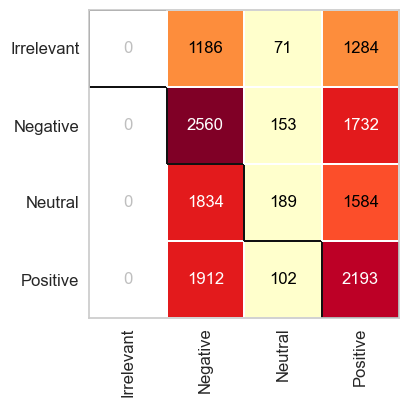

In [20]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(4,4))
cm = ConfusionMatrix(naive_twitter)
cm.fit(x_twitter_train, y_twitter_train)
cm.score(x_twitter_test, y_twitter_test)

In [21]:
print(classification_report(y_twitter_test, previsoes))

              precision    recall  f1-score   support

  Irrelevant       0.00      0.00      0.00      2541
    Negative       0.34      0.58      0.43      4445
     Neutral       0.37      0.05      0.09      3607
    Positive       0.32      0.52      0.40      4207

    accuracy                           0.33     14800
   macro avg       0.26      0.29      0.23     14800
weighted avg       0.28      0.33      0.26     14800



c:\Users\MIT1CT\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\MIT1CT\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\MIT1CT\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#Árvore de Decisão

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
with open('twitter.pkl', 'rb') as f:
    x_twitter_train, y_twitter_train, x_twitter_test, y_twitter_test = pickle.load(f)

In [23]:
from mlxtend.plotting import plot_decision_regions

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_twitter_train, y_twitter_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [24]:
x_twitter_train.shape, y_twitter_test.shape

((59196, 2), (14800,))

In [25]:
x_twitter_test.shape, y_twitter_test.shape

((14800, 2), (14800,))

In [26]:
arvore_twitter = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_twitter.fit(x_twitter_train, y_twitter_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [27]:
previsoes = arvore_twitter.predict(x_twitter_test)
previsoes

array(['Negative', 'Negative', 'Neutral', ..., 'Neutral', 'Irrelevant',
       'Negative'], shape=(14800,), dtype=object)

In [28]:
accuracy_score(y_twitter_test, previsoes)

0.798918918918919

0.798918918918919

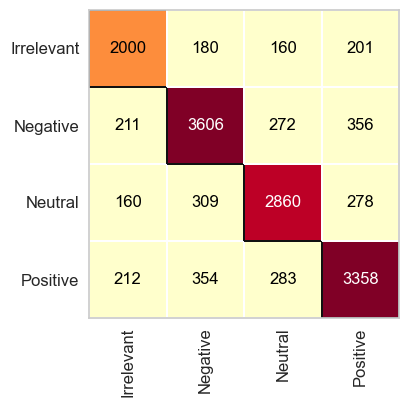

In [29]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(4,4))
cm = ConfusionMatrix(arvore_twitter)
cm.fit(x_twitter_train, y_twitter_train)
cm.score(x_twitter_test, y_twitter_test)

In [30]:
print(classification_report(y_twitter_test, previsoes))

              precision    recall  f1-score   support

  Irrelevant       0.77      0.79      0.78      2541
    Negative       0.81      0.81      0.81      4445
     Neutral       0.80      0.79      0.80      3607
    Positive       0.80      0.80      0.80      4207

    accuracy                           0.80     14800
   macro avg       0.80      0.80      0.80     14800
weighted avg       0.80      0.80      0.80     14800



#Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

with open('twitter.pkl', 'rb') as f:
    x_twitter_train, y_twitter_train, x_twitter_test, y_twitter_test = pickle.load(f)

In [32]:
random_forest_twitter = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_twitter.fit(x_twitter_train, y_twitter_train)

,n_estimators,100
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
previsoes = random_forest_twitter.predict(x_twitter_test)
previsoes

array(['Negative', 'Negative', 'Neutral', ..., 'Neutral', 'Irrelevant',
       'Negative'], shape=(14800,), dtype=object)

In [34]:
y_twitter_test

array(['Negative', 'Negative', 'Neutral', ..., 'Negative', 'Irrelevant',
       'Negative'], shape=(14800,), dtype=object)

In [35]:
accuracy_score(y_twitter_test, previsoes)

0.7995945945945946

0.7995945945945946

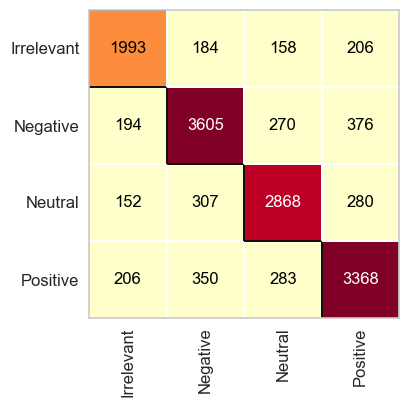

In [36]:
plt.figure(figsize=(4,4))
cm = ConfusionMatrix(random_forest_twitter)
cm.fit(x_twitter_train, y_twitter_train)
cm.score(x_twitter_test, y_twitter_test)

In [37]:
print(classification_report(y_twitter_test, previsoes))

              precision    recall  f1-score   support

  Irrelevant       0.78      0.78      0.78      2541
    Negative       0.81      0.81      0.81      4445
     Neutral       0.80      0.80      0.80      3607
    Positive       0.80      0.80      0.80      4207

    accuracy                           0.80     14800
   macro avg       0.80      0.80      0.80     14800
weighted avg       0.80      0.80      0.80     14800



#KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

with open('twitter.pkl', 'rb') as f:
    x_twitter_train, y_twitter_train, x_twitter_test, y_twitter_test = pickle.load(f)

In [39]:
knn_twitter = KNeighborsClassifier(n_neighbors=2)
knn_twitter.fit(x_twitter_train, y_twitter_train)

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [40]:
previsoes = knn_twitter.predict(x_twitter_test)
previsoes

array(['Negative', 'Negative', 'Neutral', ..., 'Negative', 'Irrelevant',
       'Negative'], shape=(14800,), dtype=object)

In [41]:
y_twitter_test

array(['Negative', 'Negative', 'Neutral', ..., 'Negative', 'Irrelevant',
       'Negative'], shape=(14800,), dtype=object)

In [42]:
accuracy_score(y_twitter_test, previsoes)

0.7089189189189189

0.7089189189189189

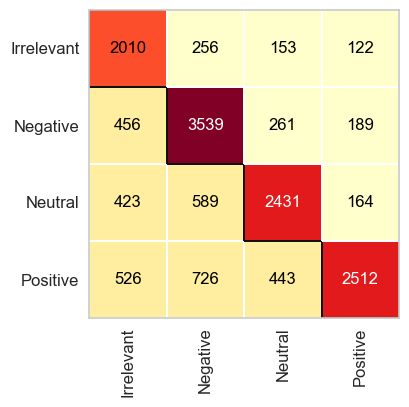

In [43]:
plt.figure(figsize=(4,4))
cm = ConfusionMatrix(knn_twitter)
cm.fit(x_twitter_train, y_twitter_train)
cm.score(x_twitter_test, y_twitter_test)

In [44]:
from sklearn.linear_model import LogisticRegression

with open('twitter.pkl', 'rb') as f:
    x_twitter_train, y_twitter_train, x_twitter_test, y_twitter_test = pickle.load(f)

In [45]:
logistc_twitter = LogisticRegression(random_state=1, max_iter=100)
logistc_twitter.fit(x_twitter_train, y_twitter_train)

c:\Users\MIT1CT\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [46]:
previsoes = logistc_twitter.predict(x_twitter_test)
previsoes

array(['Negative', 'Negative', 'Positive', ..., 'Negative', 'Negative',
       'Negative'], shape=(14800,), dtype=object)

In [47]:
y_twitter_test

array(['Negative', 'Negative', 'Neutral', ..., 'Negative', 'Irrelevant',
       'Negative'], shape=(14800,), dtype=object)

0.7089189189189189

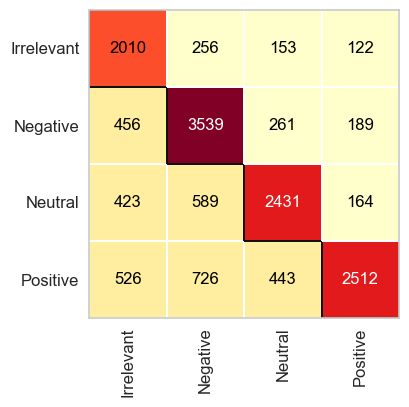

In [48]:
plt.figure(figsize=(4,4))
cm = ConfusionMatrix(knn_twitter)
cm.fit(x_twitter_train, y_twitter_train)
cm.score(x_twitter_test, y_twitter_test)